<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/Anagha_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Assignment  on Classification**

 *Do the following in the iris dataset*

*Read the dataset to python environment.
Do the necessary pre-processing steps.
 Find out which classification model gives the best result (try all the classification algorithms discussed in the session)*

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Reading and Exploratory Analysis**

In [149]:
data = pd.read_excel('/content/iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [151]:
# treating null values

data['SL'].fillna(data['SL'].mean(),inplace=True)
data['SW'].fillna(data['SW'].mean(),inplace=True)
data['PL'].fillna(data['PL'].mean(),inplace=True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [153]:
# Obtain statistical summary
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [154]:
# check for bias

data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Visualization

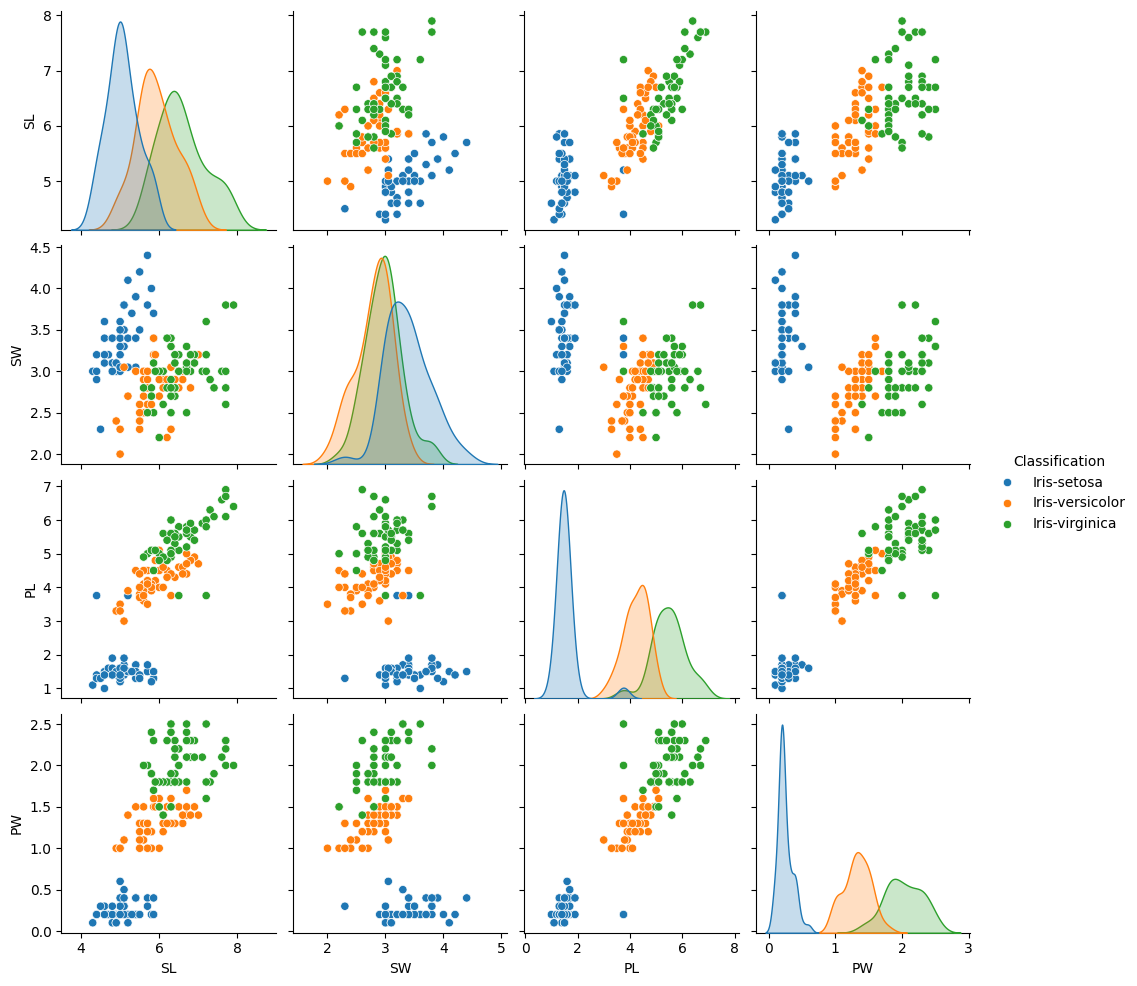

In [155]:
sns.pairplot(data,hue='Classification')

<Axes: >

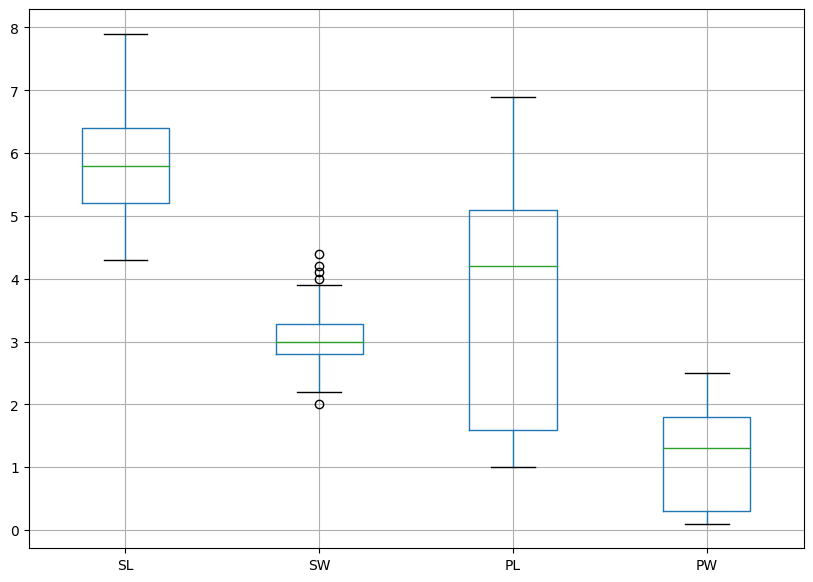

In [156]:
# Boxplot
plt.figure(figsize=(10,7))
data.boxplot()


In [157]:
# treating outliers using median

Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['SW'] < lower_bound) | (data['SW'] > upper_bound)]

median_sw = data['SW'].median()
data['SW'] = np.where((data['SW'] < lower_bound) | (data['SW'] > upper_bound), median_sw, data['SW'])


Label encoding

In [158]:

from sklearn.preprocessing import LabelEncoder

class_labels= data['Classification'].unique()
encoder = LabelEncoder()
data['Classification']= encoder.fit_transform(data['Classification'])
class_labels_encoded= encoder.transform(class_labels)

Correlation

In [159]:
data.corr()['Classification']

SL                0.773593
SW               -0.360561
PL                0.929629
PW                0.956464
Classification    1.000000
Name: Classification, dtype: float64

In [160]:
# Defining X and y
X =data.drop('Classification',axis=1)
y= data['Classification']

Train Test Split

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [162]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**Logistic Regression**

In [163]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

logit_model.fit(X_train,y_train)

y_pred = logit_model.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy is', accuracy_score(y_test, y_pred))

print('Precision is', precision_score(y_test, y_pred,average='macro'))

print('Recall is', recall_score(y_test, y_pred, average='macro'))

print('f1 score is', f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222
Recall is 0.9629629629629629
f1 score is 0.9658994032395567


**KNN Classifier**

In [165]:
from sklearn.neighbors import KNeighborsClassifier


metric_k=[]
neighbors= np.arange(3,15)

for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc= accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

accuracy is 1 for all given k values

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

print('Precision is', precision_score(y_test, y_pred_knn,average='macro'))

print('Recall is', recall_score(y_test, y_pred_knn, average='macro'))

print('f1 score is', f1_score(y_test,y_pred_knn,average='macro'))

K-Nearest Neighbors Accuracy: 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**SVC**

In [167]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

In [168]:
y_pred=svm_clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

print('Precision is', precision_score(y_test, y_pred,average='macro'))

print('Recall is', recall_score(y_test, y_pred,average='macro'))

print('f1 score is', f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222
Recall is 0.9629629629629629
f1 score is 0.9658994032395567


**Random Forest Classifier**

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
y_pred=rf_clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

print('Precision is', precision_score(y_test, y_pred,average='macro'))

print('Recall is', recall_score(y_test, y_pred,average='macro'))

print('f1 score is', f1_score(y_test,y_pred,average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


 Accuracy score of KNN and Random Forest Classifiers are 1, which is higher than the other models. Hence they perfoms the best.